# Pymaceuticals Inc.
---

### Analysis

- We can observe that for regimen Capomulin, higher the weight of the mice, larger is the tumor volume and the linear regresion model depicts this linear relationship with a corrleation of >0.8 (see scatter plot). This also means that the drug is losing its effectiveness as the weight increases

- Study seem to be quite consistent in its results, given that there exists only one outlier in the top 4 drug regimes

- Line graph of Capomulin Treatment for Mouse chosen j119 clearly shows that the tumor volume reduces with time in a meaningfully way.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# from sklearn import datasets
from scipy.stats import linregress
from matplotlib.pyplot import subplots, show

# Study data files
mouse_metadata_path = "Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Clinical_data_complete = pd.merge(study_results,mouse_metadata,  how="left", on=["Mouse ID"])


In [2]:
# Display the data table for preview
Clinical_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.
Clinical_data_complete['Mouse ID'].nunique()

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

newdup = Clinical_data_complete[Clinical_data_complete.duplicated()]
newdup['Mouse ID']

137    g989
Name: Mouse ID, dtype: object

In [7]:
# Optional: Get all the data for the duplicate mouse ID.  
g989 = Clinical_data_complete.loc[Clinical_data_complete['Mouse ID']=='g989',:]
g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
Clean_Df = Clinical_data_complete.drop(Clinical_data_complete[(Clinical_data_complete['Mouse ID']=='g989')].index)
Clean_Df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [9]:
# Checking the number of mice in the clean DataFrame.
Clean_Df["Mouse ID"].nunique()

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Groupby and mean
mean=Clean_Df.groupby("Drug Regimen").mean('Tumor Volume (mm3)')[['Tumor Volume (mm3)']]
mean

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.320930
Ramicane,40.216745
Stelasyn,54.233149


In [11]:
# Groupby and median
median = Clean_Df.groupby("Drug Regimen").median('Tumor Volume (mm3)')[['Tumor Volume (mm3)']]
median

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.446266
Ramicane,40.673236
Stelasyn,52.431737


In [12]:
# Groupby and variance
variance = Clean_Df.groupby("Drug Regimen").var()[['Tumor Volume (mm3)']]
variance
 

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,43.852013
Ramicane,23.486704
Stelasyn,59.450562


In [13]:
# Groupby and standard deviation
stdev = Clean_Df.groupby("Drug Regimen").std()[['Tumor Volume (mm3)']]
stdev

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.622085
Ramicane,4.846308
Stelasyn,7.710419


In [14]:
# Groupby and SEM
SEM = Clean_Df.groupby("Drug Regimen").sem()[['Tumor Volume (mm3)']]
SEM

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.544332
Ramicane,0.320955
Stelasyn,0.573111


In [15]:
# Assemble the resulting series into a single summary DataFrame.
Summary = pd.DataFrame({'Mean Tumor Volume':mean['Tumor Volume (mm3)'],
                        'Median Tumor Volume':median['Tumor Volume (mm3)'],
                        'Tumor Volume Variance':variance['Tumor Volume (mm3)'],
                        'Tumor Volume Std. Dev.':stdev['Tumor Volume (mm3)'],
                        'Tumor Volume Std. Err.':SEM['Tumor Volume (mm3)']              
                        })
Summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [359]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

In [16]:
Summary2 = Clean_Df.groupby("Drug Regimen").agg({'Tumor Volume (mm3)':['mean', 'median', 'var','std','sem']})
Summary2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [17]:
 Clean_Df[:2]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29


In [186]:

plot1 = Clean_Df.groupby('Drug Regimen').count()[['Timepoint']]
plot1


,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

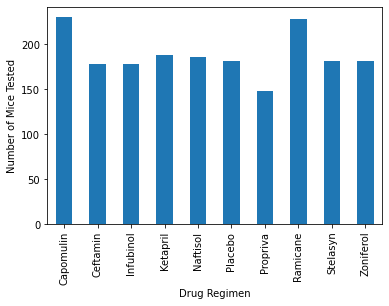

In [19]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

plot1.plot(kind = 'bar',xlabel = 'Drug Regimen', ylabel='Number of Mice Tested',legend = False)

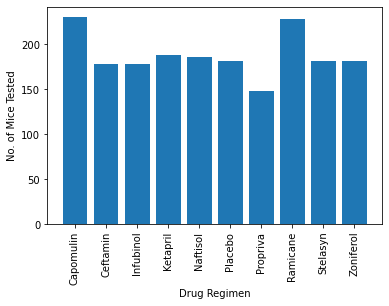

In [187]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x = plot1.index
y = plot1['Timepoint']
plt.bar(x,y)
plt.xlabel("Drug Regimen")
plt.ylabel('No. of Mice Tested')
plt.xticks(rotation = 90)
plt.show()

In [21]:
Clinical_data_complete[:1]
Clean_Df[:1]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22


In [195]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

Gender_distribution = Clean_Df["Sex"].value_counts()
Gender_distribution

Male      958
Female    922
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

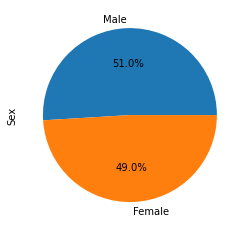

In [196]:
Gender_distribution.plot(kind='pie',autopct='%1.1f%%')

Text(0.5, 1.0, 'Sex')

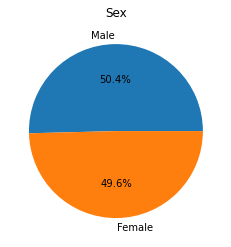

In [135]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male','Female']
plt.pie(Gender_distribution,labels = labels, autopct="%1.1f%%")
plt.title('Sex', loc='center', rotation = 0)

## Quartiles, Outliers and Boxplots

In [199]:
## Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxTp = Clean_Df.groupby('Mouse ID')[['Timepoint']].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
maxTumor = maxTp.merge(Clean_Df, on = ['Mouse ID','Timepoint'])
maxTumor

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [180]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumorList = []

for drug in drugs:
    drugData = maxTumor[maxTumor['Drug Regimen'] == drug]['Tumor Volume (mm3)']


# Calculate the IQR and quantitatively determine if there are any potential outliers.    
    iqr = drugData.quantile(0.75) - drugData.quantile(0.25)

# Locate the rows which contain mice on each drug and get the tumor volumes
    lower_bound = drugData.quantile(0.25) - (1.5*iqr)
    upper_bound = drugData.quantile(0.75) + (1.5*iqr)
    

# Determine outliers using upper and lower bounds
    print(f'{drug} potential outliers are: {drugData[(drugData<lower_bound)|(drugData>upper_bound)]}')    
    tumorList.append(drugData)

Capomulin potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


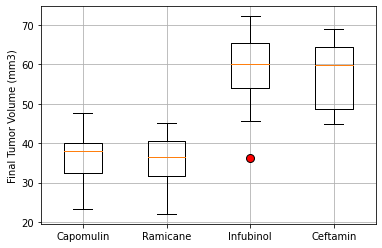

In [184]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')
plt.boxplot(tumorList, labels = drugs,flierprops=flierprops)
plt.grid()
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

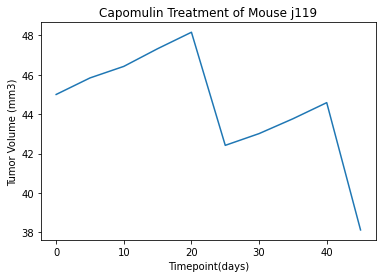

In [200]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_capo = Clean_Df.loc[Clean_Df['Drug Regimen']=='Capomulin']
mouse_capo=mouse_capo[['Mouse ID','Timepoint', 'Tumor Volume (mm3)']]
chosen_mouse=mouse_capo.iloc[10,0]
chosen_mouse_df = mouse_capo.loc[mouse_capo['Mouse ID']==chosen_mouse][['Timepoint','Tumor Volume (mm3)']]
plt.plot('Timepoint', 'Tumor Volume (mm3)', data=chosen_mouse_df)
plt.title(f'Capomulin Treatment of Mouse {chosen_mouse}')
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")

In [31]:
#  Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = Clean_Df.loc[Clean_Df['Drug Regimen']=='Capomulin'][['Mouse ID','Tumor Volume (mm3)','Weight (g)']]
df3=capomulin.groupby('Mouse ID').mean()
df3

,Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22.0
b742,40.083699,21.0
f966,36.505973,17.0
g288,41.990097,19.0
g316,44.613344,22.0
i557,44.805810,24.0
i738,39.141053,20.0
j119,44.465236,23.0
j246,43.216925,21.0


Text(0, 0.5, 'Average Tumor Volume (mm3)')

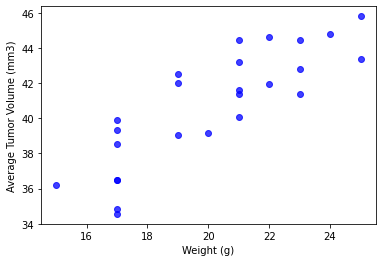

In [87]:
x = df3['Weight (g)']
y=df3['Tumor Volume (mm3)']
plt.scatter(x,y, marker="o", facecolors='blue',alpha=0.75)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

In [85]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen



The correlation between mouse weight and the average tumor volume is 0.84


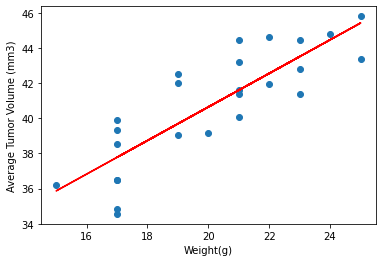

In [88]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
correlation = st.pearsonr(x,y)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [277]:
print(line_eq)

y = 0.95x + 21.55
